In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import joblib

# Define the path to the Excel file

file_path = r"C:\Users\BABITHA W M\Documents\Prediction_Data.xlsx"

 

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

 

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

 

# Display the first few rows of the fetched data
print(data.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   12739-HAR    Male   57     Yes      Haryana                    1   
1   12746-WES    Male   53      No  West Bengal                    7   
2   12752-RAJ  Female   30      No    Rajasthan                    4   
3   12762-TAM  Female   39      No   Tamil Nadu                   11   
4   12808-MAH    Male   70     Yes  Maharashtra                    4   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31        NaN           Yes            Yes  ...   
1                17        NaN           Yes             No  ...   
2                17        NaN           Yes             No  ...   
3                18        NaN           Yes             No  ...   
4                 9        NaN           Yes            Yes  ...   

  Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0    Credit Card      88.650002   5321.250000           0.0   
1    Credit Card      19.950001 

In [3]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

 

# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]

 

# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])

 

# Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

 

# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

 

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[817  41]
 [127 217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       858
           1       0.84      0.63      0.72       344

    accuracy                           0.86      1202
   macro avg       0.85      0.79      0.81      1202
weighted avg       0.86      0.86      0.85      1202



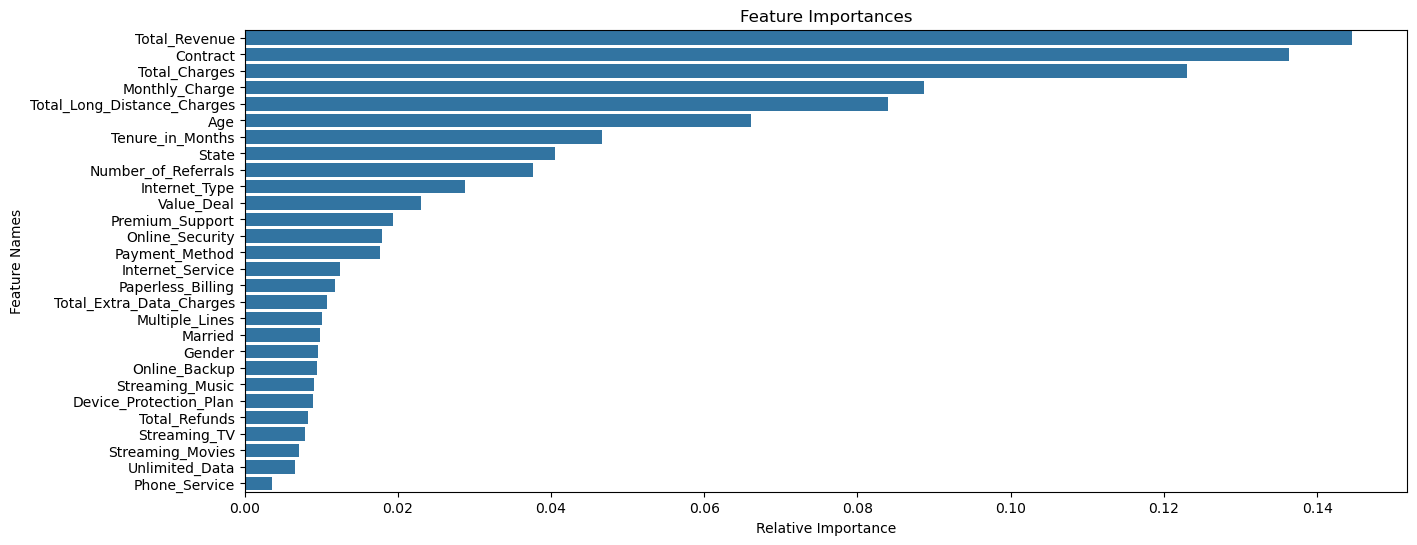

In [5]:
#Evaluate Model

# Make predictions

y_pred = rf_model.predict(X_test)

 

# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

 

# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

 

# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

In [13]:
import pandas as pd

# Define the path to the Joiner Data Excel file
file_path = r"C:\Users\BABITHA W M\Documents\Prediction_Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_JoinData'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"C:\Users\BABITHA W M\Documents\Prediction_Data.csv", index=False)


  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   15591-KAR  Female   26      No    Karnataka                    3   
1   21642-TEL    Male   60     Yes    Telangana                   12   
2   23855-MAH  Female   53     Yes  Maharashtra                   13   
3   26412-ASS  Female   30      No        Assam                    7   
4   26448-BIH  Female   57      No        Bihar                   10   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31        NaN           Yes             No  ...   
1                29        NaN           Yes             No  ...   
2                 9        NaN           Yes             No  ...   
3                18        NaN           Yes             No  ...   
4                21     Deal 5           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      20.400000     20.400000           0.0   
1  Bank Withdrawal      54.5